# Predicting Admission into UCLA- EDA

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## Loading Data set
data=pd.read_csv('admission_predict.txt')

## Exploring Dataset

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.shape

(500, 9)

In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

## Checking for Nan values

In [10]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no nan values

## Exploring Features

In [11]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


* **GRE Score**

In [12]:
data['GRE Score'].describe()

count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

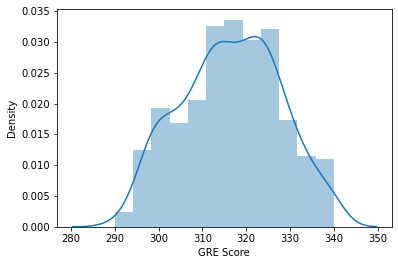

In [13]:
sns.distplot(data['GRE Score'])

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Student')

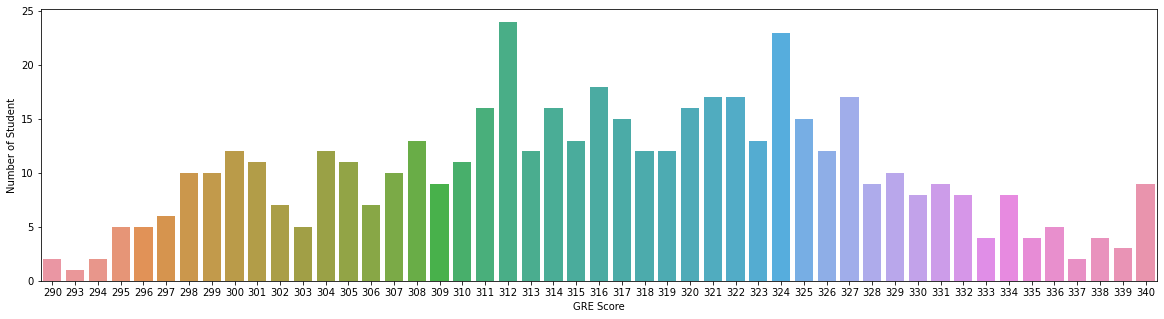

In [14]:
## Top GRE score for students
plt.figure(figsize=(20,5))

gre_score=data['GRE Score'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(gre_score['index'],gre_score['GRE Score'])
plt.xlabel('GRE Score')
plt.ylabel('Number of Student')


C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


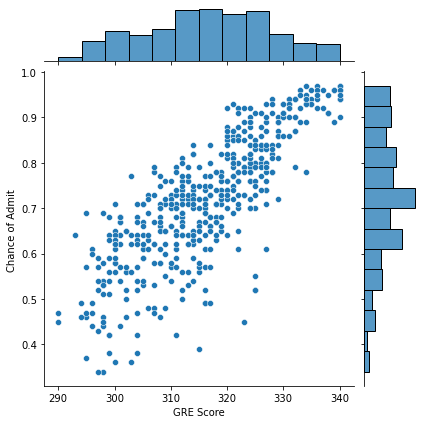

In [15]:
## Relationship between GRE Score and the problablity of admission
sns.jointplot('GRE Score','Chance of Admit ',data=data)

We can see there this **positive corelation** between GRE Score and Probablity of Admission

* **TOEFL Score**

In [16]:
data['TOEFL Score'].describe()

count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64

In [17]:
data['TOEFL Score'].value_counts()

110    44
105    37
104    29
112    28
107    28
106    28
103    25
102    24
100    24
99     23
111    20
101    20
113    19
109    19
108    19
114    18
116    16
115    11
119    10
98     10
118    10
120     9
117     8
97      7
96      6
95      3
94      2
93      2
92      1
Name: TOEFL Score, dtype: int64

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

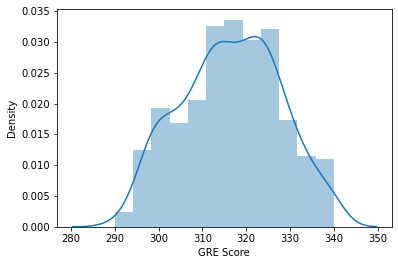

In [18]:
sns.distplot(data['GRE Score'])

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Student')

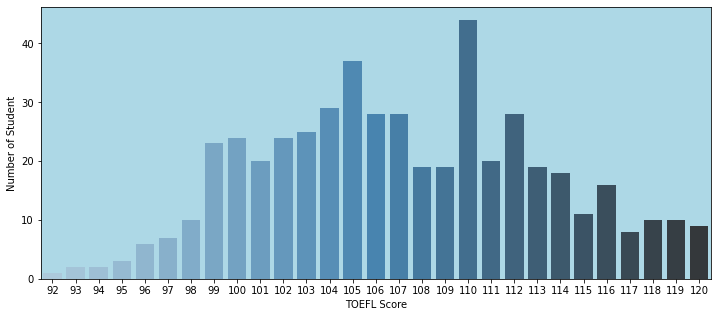

In [19]:
plt.figure(figsize=(12,5))

ax = plt.axes()
ax.set(facecolor = 'lightblue')
gre_score=data['TOEFL Score'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(gre_score['index'],gre_score['TOEFL Score'],palette="Blues_d",color='smoker')
plt.xlabel('TOEFL Score')
plt.ylabel('Number of Student')

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


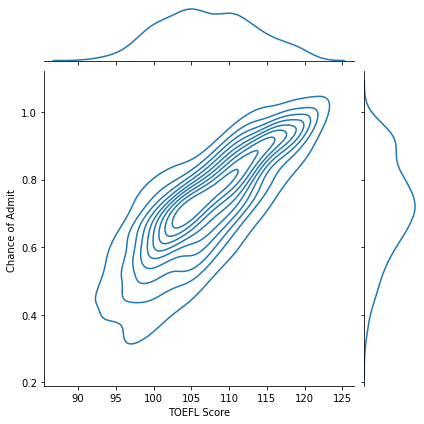

In [21]:
## Relationship between GRE Score and the problablity of admission
sns.jointplot('TOEFL Score','Chance of Admit ',data=data,kind="kde",palette='hls')

We can see there this **positive corelation** between GRE Score and Probablity of Admission

* **University Rating** ,**CGPA** and **Research**

In [22]:
data['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

<AxesSubplot:xlabel='University Rating', ylabel='Count'>

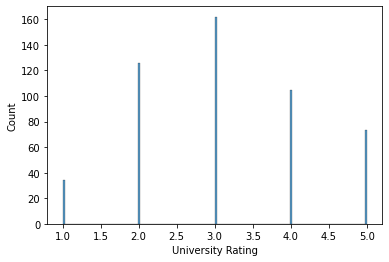

In [28]:
sns.histplot(x=data['University Rating'],bins=150)

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

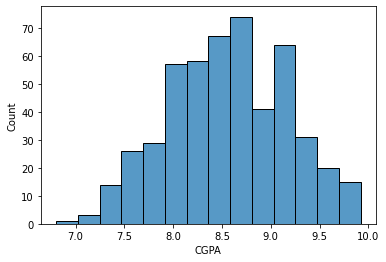

In [30]:
sns.histplot(data['CGPA'])

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

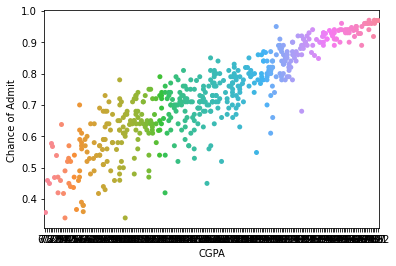

In [40]:
sns.stripplot(data['CGPA'],data['Chance of Admit '],edgecolor='Blue')

There is a **positive relationship** between Chance of admit and CGPA

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Research', ylabel='count'>

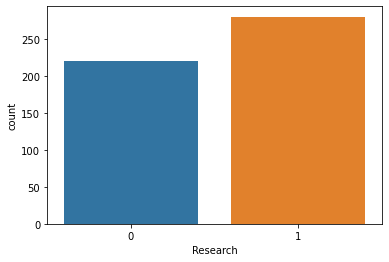

In [31]:
sns.countplot(data['Research'])

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

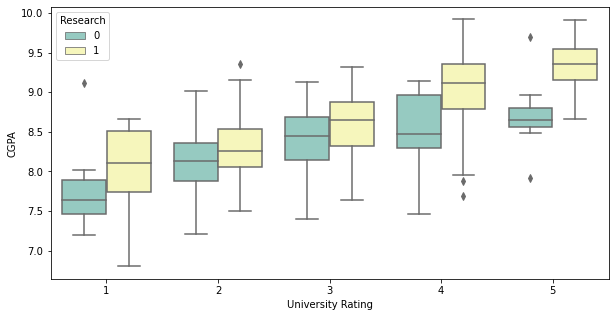

In [35]:
## We can see the relationship between University rating and CGPA which requires research

plt.figure(figsize=(10,5))
sns.boxplot(x='University Rating',y='CGPA',data=data,palette="Set3",hue='Research')

We can see as the rating of the University increases the CGPA and Research required is also increasing

* **SOP** and **LOR**

In [36]:
data['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Student')

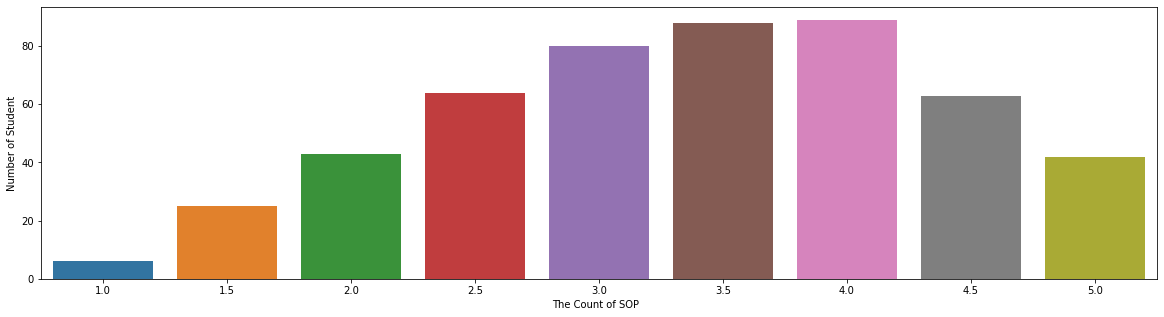

In [37]:
plt.figure(figsize=(20,5))

sop_score=data['SOP'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(sop_score['index'],sop_score['SOP'])
plt.xlabel('The Count of SOP  ')
plt.ylabel('Number of Student')

In [38]:
data['LOR '].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
5.0    50
2.5    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOR ', ylabel='Density'>

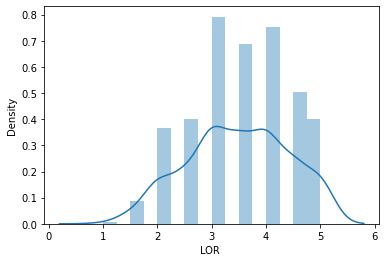

In [39]:
sns.distplot(data['LOR '])

<AxesSubplot:xlabel='LOR ', ylabel='Chance of Admit '>

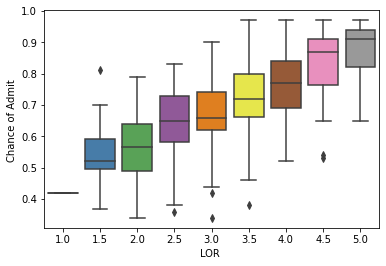

In [44]:
sns.boxplot(x='LOR ',y='Chance of Admit ',data=data,palette="Set1")

As the LOR increases the chance of admit also increases

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit '>

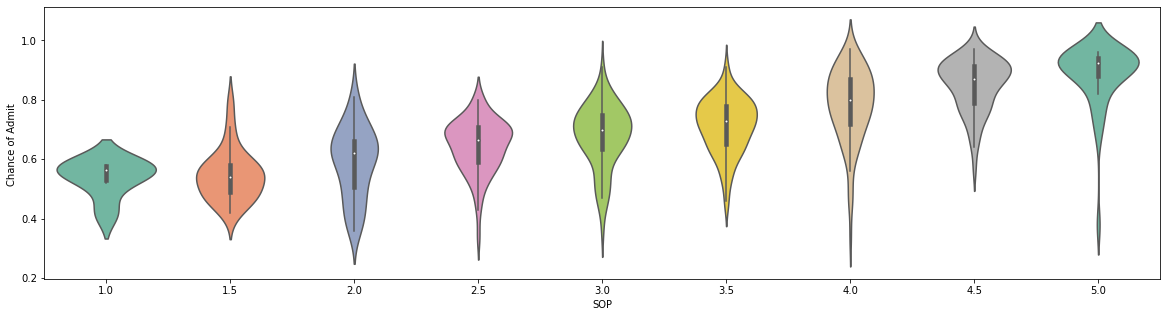

In [56]:
plt.figure(figsize=(20,5))
sns.violinplot(x='SOP',y='Chance of Admit ',data=data ,palette="Set2")

* Correlation between all the features

<AxesSubplot:>

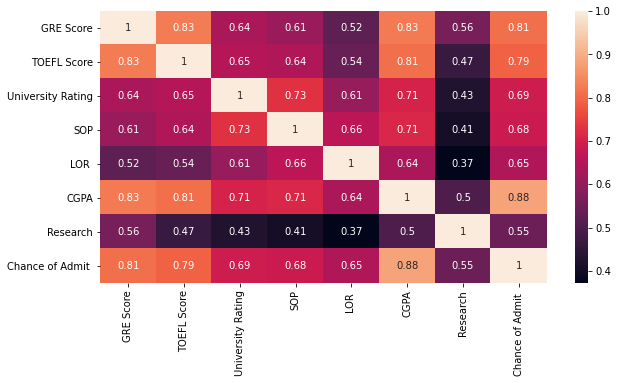

In [60]:
corr=data.drop('Serial No.',axis=1).corr()
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(corr, annot = True)

## Data Cleaning

In [61]:
## Removing Serial Number
data=data.drop('Serial No.',axis=1)

In [62]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [66]:
indep_features=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']
data[indep_features].head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [64]:
## Checking for Zero values in feature
for feature in data.columns.drop('Research','Chance of Admit'):
    print('Number of rows missing in',feature,'is',len(data[data[feature]==0]))

Number of rows missing in GRE Score is 0
Number of rows missing in TOEFL Score is 0
Number of rows missing in University Rating is 0
Number of rows missing in SOP is 0
Number of rows missing in LOR  is 0
Number of rows missing in CGPA is 0
Number of rows missing in Chance of Admit  is 0


In [67]:
## Assigning values of Dependent and Independent features
X=data[indep_features]
y=data['Chance of Admit ']

In [76]:
print(X.columns)
print(y)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64


## Feature Scaling

In [88]:
## Import StandardScaler and apply for feature scaling
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()


In [89]:
## Features are scaled
X_scaled=min_max.fit_transform(X)

Text(0.5, 1.0, 'Distribution of CGPA')

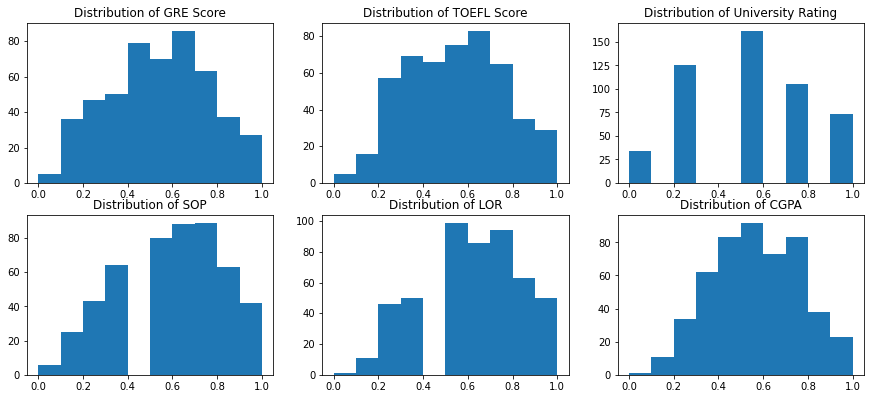

In [92]:
## Distribution of all the independent features after scaling
plt.figure(figsize=[15,10])
plt.subplot(3,3,1)
plt.hist(X_scaled[:,0])
plt.title('Distribution of GRE Score')

plt.subplot(3,3,2)
plt.hist(X_scaled[:,1])
plt.title('Distribution of TOEFL Score')

plt.subplot(3,3,3)
plt.hist(X_scaled[:,2])
plt.title('Distribution of University Rating')

plt.subplot(3,3,4)
plt.hist(X_scaled[:,3])
plt.title('Distribution of SOP')

plt.subplot(3,3,5)
plt.hist(X_scaled[:,4])
plt.title('Distribution of LOR')

plt.subplot(3,3,6)
plt.hist(X_scaled[:,5])
plt.title('Distribution of CGPA')